In [22]:
import os
import sys
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0,rpath)
from src.plots import Plot

In [24]:
df = pd.read_csv('../data/cleaned_data_outliers.csv')

In [25]:
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,14.416352,32.969527,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,16.578971,14.732334,15.919515,16.083116,19.443428,16.478853,18.961518,15.991897,17.419642,19.548462
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,14.126741,32.969529,3.368185e+10,3.579401e+13,L77566A,...,16.823537,16.765813,16.724508,16.661996,20.226918,13.973120,20.082529,16.527230,17.800791,20.297677
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,14.124290,32.969522,3.376063e+10,3.528151e+13,D42335A,...,16.797431,16.503329,16.682716,15.634140,19.251782,12.888235,19.833356,15.254341,17.143551,19.449612
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,14.094285,32.969527,3.375034e+10,3.535661e+13,T21824A,...,16.878346,16.533289,16.454185,13.908948,20.499545,16.199650,20.434303,16.364743,17.584222,20.556064
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,13.900779,32.969527,3.369980e+10,3.540701e+13,D88865A,...,16.540705,16.757994,16.656025,12.936559,20.084052,15.076752,20.126718,16.448142,17.467280,20.159635


In [26]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [27]:
df["social_media"] = df["Social Media DL (Bytes)"] + df['Social Media UL (Bytes)']
df["google"] = df["Google DL (Bytes)"] + df["Google UL (Bytes)"]
df['email'] = df["Email DL (Bytes)"] + df["Email UL (Bytes)"]
df['youtube'] = df["Youtube DL (Bytes)"] + df["Youtube UL (Bytes)"]
df['netflix'] = df["Netflix DL (Bytes)"] + df["Netflix UL (Bytes)"]
df["gaming"] = df["Gaming DL (Bytes)"] + df["Gaming UL (Bytes)"]
df['other'] = df["Other DL (Bytes)"]+df["Other UL (Bytes)"]
df['total_data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [28]:
data = df.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms)':sum,'total_data':sum})
data_aggregate = data.reset_index()
data_aggregate['MSISDN/Number']

0         3.360100e+10
1         3.360100e+10
2         3.360100e+10
3         3.360101e+10
4         3.360101e+10
              ...     
106851    3.379000e+10
106852    3.379000e+10
106853    3.197021e+12
106854    3.370000e+14
106855    8.823971e+14
Name: MSISDN/Number, Length: 106856, dtype: float64

In [29]:
sessions = data_aggregate.nlargest(10, "Bearer Id")['Bearer Id']
duration = data_aggregate.nlargest(10, "Dur. (ms)")['Dur. (ms)']
total_data = data_aggregate.nlargest(10, "total_data")['total_data']

In [30]:
sesssions_df = pd.DataFrame()
sesssions_df['User_ID'] = sessions.index
sesssions_df['Sessions'] = sessions.values
durations_df = pd.DataFrame()
durations_df['User_ID'] = duration.index
durations_df['duration'] = duration.values
total_data_df = pd.DataFrame()
total_data_df['User_ID'] = total_data.index
total_data_df['total_data'] = total_data.values

Aggregate per-customer id and report top 10 engagement 

[]

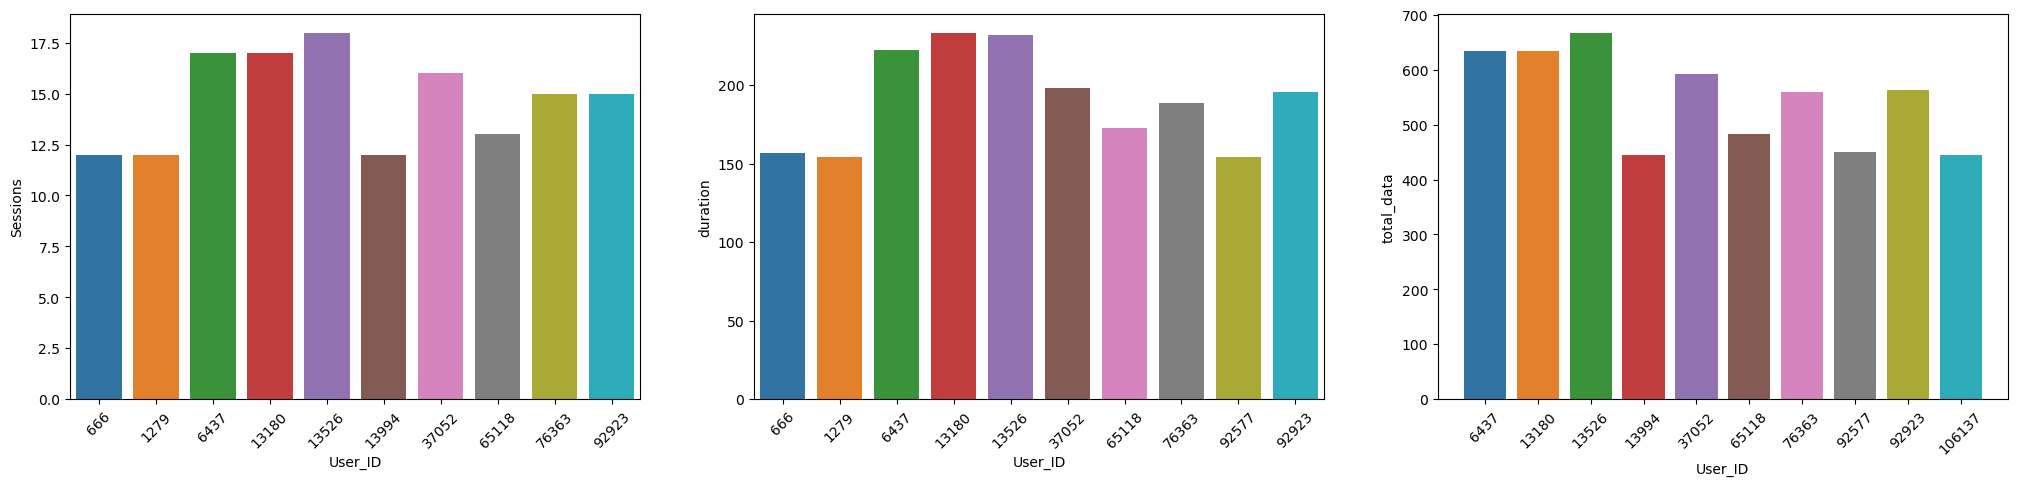

In [31]:
f, axes = plt.subplots(1, 3, figsize=(25, 5))
ax1 = sns.barplot(data=sesssions_df, x='User_ID', orient='v', y='Sessions', ax=axes[0])
ax2 = sns.barplot(data=durations_df, x='User_ID',orient='v', y='duration', ax=axes[1])
ax3 = sns.barplot(data=total_data_df, x='User_ID',orient='v', y='total_data', ax=axes[2])
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=45)
ax3.set_xticklabels(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.plot()
